In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("pm_nasa.xlsx")

In [4]:
df.tail(5)

,StationNum,GMT,AQS,LAT,LON,YEAR,MONTH,DAY,MODHR,TAU,...,PM24H,RUCHR,RUCPIX,TMP,RH,WS10m,WS925,HPBL,PRS,VIS
23277,320,-5,371170001,35.81,-76.90,2006,12,30,15.25,0.07,...,10.67,15,6,280.12,88.94,0.93,6.11,124.83,1033.20,9.34
23278,344,-5,371910005,35.37,-77.99,2006,12,30,16.83,0.10,...,13.08,17,8,286.85,57.07,2.21,3.01,290.00,1028.37,20.85
23279,320,-5,371170001,35.81,-76.90,2006,12,31,15.92,0.17,...,13.38,16,6,287.57,55.72,3.08,0.88,442.83,1028.75,21.33
23280,330,-5,371290002,34.36,-77.84,2006,12,31,15.92,0.12,...,8.96,16,5,290.58,65.91,2.95,7.67,575.80,1027.60,15.76
23281,250,-6,280110001,33.75,-90.72,2006,12,31,17.58,0.11,...,5.38,18,6,288.20,65.30,5.93,8.69,872.67,1011.98,17.03


In [5]:
df.columns

Index(['StationNum', 'GMT', 'AQS', 'LAT', 'LON', 'YEAR', 'MONTH', 'DAY',
       'MODHR', 'TAU', 'CLOUD', 'MODPIX', 'PM1H', 'PM24H', 'RUCHR', 'RUCPIX',
       'TMP', 'RH', 'WS10m', 'WS925', 'HPBL', 'PRS', 'VIS'],
      dtype='object')

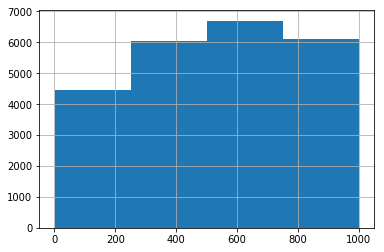

In [21]:
df['HPBL'].hist(bins = 4)